# DataCamp

## Dictionaries

In [349]:
a = {'key1':'a b c d'.split(),'key2':[1,2,3,4]}
a

{'key1': ['a', 'b', 'c', 'd'], 'key2': [1, 2, 3, 4]}

In [350]:
a['key1'].append('e')

In [352]:
a.update({'key3':['a',1,'b',2,'c',3,'d',4]})
a

{'key1': ['a', 'b', 'c', 'd', 'e'],
 'key2': [1, 2, 3, 4],
 'key3': ['a', 1, 'b', 2, 'c', 3, 'd', 4]}

## Counter

In [2]:
from collections import Counter

names = ['Chirag']*10 + ['Dawal']*2 + ['Ravi']
count_by_names = Counter(names)
print(count_by_names)
count_by_names.most_common(1)

Counter({'Chirag': 10, 'Dawal': 2, 'Ravi': 1})


[('Chirag', 10)]

## Dictionaries of unknown structure - Defaultdict 

In [5]:
from collections import defaultdict

'''
'Defaultdict intializes a dictionaly which will have values in form of lists. 
This is helpful when you want to add a key if it already does not exist and append to it at the same time 
'''
eateries_by_park = defaultdict(list)

eateries_by_park['key1'].append('Chirag')
eateries_by_park

defaultdict(list, {'key1': ['Chirag']})

## Maintaining Dictionary order with Orderdict

In [6]:
from collections import OrderedDict

birthdates = [('Chirag','03/25/1990'),
              ('Dawal','04/15/1988'),
              ('Bina','02/06/1987'),
              ('Nirali','12/17/1990')]

birthdays = OrderedDict()

for name, date in birthdates:
    if name not in birthdays:
        birthdays[name] = date
        
print(birthdays)
birthdays.popitem(last=False)[0]

OrderedDict([('Chirag', '03/25/1990'), ('Dawal', '04/15/1988'), ('Bina', '02/06/1987'), ('Nirali', '12/17/1990')])


'Chirag'

## Namedtuples

In [7]:
from collections import namedtuple

Birthdays = namedtuple('Birthdays',['name','date'])

dates = []

for name, date in birthdates:
    details = Birthdays(name,date)
    dates.append(details)

In [9]:
dates

[Birthdays(name='Chirag', date='03/25/1990'),
 Birthdays(name='Dawal', date='04/15/1988'),
 Birthdays(name='Bina', date='02/06/1987'),
 Birthdays(name='Nirali', date='12/17/1990')]

## DateTime

In [4]:
from datetime import datetime

c_birthday = '03/25/1990'

date_dt = datetime.strptime(c_birthday,'%m/%d/%Y')
print(type(date_dt))
print(date_dt)

<class 'datetime.datetime'>
1990-03-25 00:00:00


- strptime: to convert from string to dateime object
- strftime: to convert from datetime to string
- isoformat: converts datetime object to iso format

In [10]:
print('Indian format:',date_dt.strftime('%d/%m/%Y'))
print(date_dt.isoformat())

Indian format: 25/03/1990
1990-03-25T00:00:00


### Working with Datetime Components and current time
- current time zone
- current time zone in UTC format
- time zones

In [15]:
datetime.now()

datetime.datetime(2020, 3, 12, 22, 43, 22, 355730)

In [14]:
datetime.utcnow()

datetime.datetime(2020, 3, 13, 2, 42, 6, 354229)

In [16]:
from pytz import timezone

In [17]:
record_dt = datetime.strptime('07/12/2016 04:39PM','%m/%d/%Y %H:%M%p')

In [18]:
record_dt

datetime.datetime(2016, 7, 12, 4, 39)

In [27]:
# Creating timezone objects
ny_tz = timezone('US/Eastern')
la_tz = timezone('US/Pacific')

ny_dt = record_dt.replace(tzinfo=ny_tz)

la_dt = ny_dt.astimezone(la_tz)

In [28]:
print(record_dt)
print(ny_dt)
print(la_dt)

2016-07-12 04:39:00
2016-07-12 04:39:00-04:56
2016-07-12 02:35:00-07:00


## Time Travel (Adding and Subtracting Time)
- adding subracting time using a timedelta object
- getting a time difference, like age

In [29]:
from datetime import timedelta

In [31]:
# Lets find out what was the date 90 days back
flashback = timedelta(days=90)
print("Today's date:", record_dt)
print("Date 90 days back: ",record_dt - flashback)

Today's date: 2016-07-12 04:39:00
Date 90 days back:  2016-04-13 04:39:00


In [33]:
my_bdt_str = '03/25/1990 08:41PM'
my_bdt = datetime.strptime(my_bdt_str,'%m/%d/%Y %H:%M%p')
print('My birthday datetime:',my_bdt)

My birthday datetime: 1990-03-25 08:41:00


In [38]:
current_dt = datetime.now()
print('Current datetime:',current_dt)

Current datetime: 2020-03-12 23:19:25.436434


In [39]:
my_age = current_dt - my_bdt
print('My age:',my_age)

My age: 10945 days, 14:38:25.436434


In [66]:
my_age.total_seconds()

945700705.436434

In [63]:
1e9 - my_age.total_seconds()

54299294.56356597

## HELP! Libraries to make it easier

In [69]:
import pendulum

In [73]:
print(my_bdt_str)
my_bdt = pendulum.parse(my_bdt_str,tz='US/Eastern')
print(my_bdt)

03/25/1990 08:41PM
1990-03-25T20:41:00-05:00


In [95]:
# If was born in the US at the same time, what would be my brithday in the Indian time zone?
print(my_bdt.in_timezone('Asia/Kolkata'))

1990-03-26T07:11:00+05:30


In [100]:
my_age = pendulum.now() - my_bdt

In [112]:
print('My age is:')
print(my_age.in_words())
print(my_age.in_years(),'years')
print(my_age.in_months(),'months')
print(my_age.in_weeks(),'weeks')
print(my_age.in_days(),'days')
print(my_age.in_hours(),'hours')
print(my_age.in_minutes(),'minutes')
print(my_age.in_seconds(),'seconds')

My age is:
29 years 11 months 2 weeks 2 days 2 hours 21 minutes 52 seconds
29 years
359 months
1563 weeks
10946 days
262682 hours
15760941 minutes
945656512 seconds


In [119]:
print(my_bdt.to_date_string())
print(my_bdt.to_iso8601_string())
print(my_bdt.to_datetime_string())

1990-03-25
1990-03-25T20:41:00-05:00
1990-03-25 20:41:00


# Counting within Date Ranges

## Reading your data with CSV Reader and Establishing your Data Containers
Let's get started! The exercises in this chapter are intentionally more challenging, to give you a chance to really solidify your knowledge. Don't lose heart if you find yourself stuck; think back to the concepts you've learned in previous chapters and how you can apply them to this crime dataset. Good luck!

Your data file, crime_sampler.csv contains the date (1st column), block where it occurred (2nd column), primary type of the crime (3rd), description of the crime (4th), description of the location (5th), if an arrest was made (6th), was it a domestic case (7th), and city district (8th).

Here, however, you'll focus only 4 columns: The date, type of crime, location, and whether or not the crime resulted in an arrest.

Your job in this exercise is to use a CSV Reader to load up a list to hold the data you're going to analyze.

**Instructions**

- Import the Python csv module.
- Create a Python file object in read mode for crime_sampler.csv called csvfile.
- Create an empty list called crime_data.
- Loop over a csv reader on the file object :
    - Inside the loop, append the date (first element), type of crime (third element), location description (fifth element), and arrest (sixth element) to the crime_data list.
- Remove the first element (headers) from the crime_data list.
- Print the first 10 records of the crime_data list. This has been done for you, so hit 'Submit Answer' to see the result!

In [ ]:
# Import the csv module
import csv

# Create the file object: csvfile
csvfile = open('crime_sampler.csv','r')

# Create an empty list: crime_data
crime_data = []

# Loop over a csv reader on the file object
for row in csv.reader(csvfile):

    # Append the date, type of crime, location description, and arrest
    crime_data.append((row[0], row[2], row[4], row[5]))
    
# Remove the first element from crime_data
crime_data.pop(0)

# Print the first 10 records
print(crime_data[:10])

## Find the Months with the Highest Number of Crimes
Using the crime_data list from the prior exercise, you'll answer a common question that arises when dealing with crime data: How many crimes are committed each month?

Feel free to use the IPython Shell to explore the crime_data list - it has been pre-loaded for you. For example, crime_data[0][0] will show you the first column of the first row which, in this case, is the date and time time that the crime occurred.


**Instructions**

- Import Counter from collections and datetime from datetime.
- Create a Counter object called crimes_by_month.
- Loop over the crime_data list:
    - Using the datetime.strptime() function, convert the first element of each item into a Python Datetime Object called date.
    - Increment the counter for the month associated with this row by one. You can access the month of date using date.month.
- Print the 3 most common months for crime.

In [187]:
## Since there is no access to the data used by Datacamp, we will use the House Price Dataset

import pandas as pd

df = pd.read_csv('data/01-House-Price/train.csv')

### Count number of occurance of BldgType that have an OverallQual = 10

In [213]:
from collections import Counter

topOverallQual_by_bldgType = Counter()

# Find the BldgTypes that has highest number of OverallQual of 7
for i, row in df.iterrows():
    if row['OverallQual'] == 7:
        topOverallQual_by_bldgType[row['BldgType']] += 1

In [214]:
topOverallQual_by_bldgType

Counter({'1Fam': 270, 'Duplex': 2, 'TwnhsE': 34, 'Twnhs': 12, '2fmCon': 1})

In [218]:
topOverallQual_by_bldgType.most_common(1)

[('1Fam', 270)]

## List minute-by-minute voltage for every month in the year 2010

In [340]:
df = pd.read_csv('data/04-Household-Power-Consumption/household_power_consumption.txt',sep=';')
df = df[df['Date'].str.contains(r'2010')]
df['Datetime'] = df.apply(lambda df: df['Date']+" "+df["Time"], axis=1)
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
1600236,1/1/2010,00:00:00,1.790,0.236,240.650,7.400,0.000,0.000,18.0
1600237,1/1/2010,00:01:00,1.780,0.234,240.070,7.400,0.000,0.000,18.0
1600238,1/1/2010,00:02:00,1.780,0.234,240.150,7.400,0.000,0.000,19.0
1600239,1/1/2010,00:03:00,1.746,0.186,240.260,7.200,0.000,0.000,18.0
1600240,1/1/2010,00:04:00,1.686,0.102,240.120,7.000,0.000,0.000,18.0


Text(0.5, 0.98, 'Voltage Distributions Acorss Months')

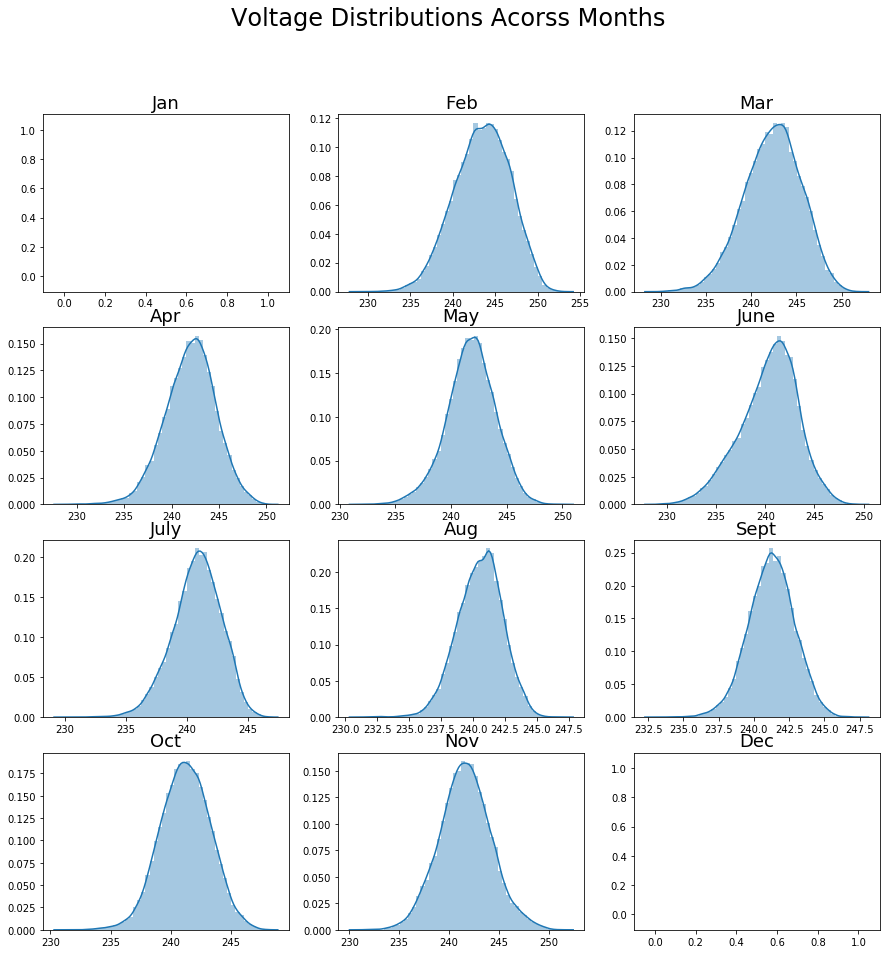

In [346]:
from collections import defaultdict

voltages_by_month_in_2010 = defaultdict(list)

for i, row in df.iterrows():
    date = datetime.strptime(row['Datetime'],'%d/%m/%Y %H:%M:%S')
    if type(row['Voltage']) == str:
        if row['Voltage'].strip().split('.')[0].isnumeric():
            voltages_by_month_in_2010[date.month].append(float(row['Voltage']))
            
            
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline


months = 'Jan Feb Mar Apr May June July Aug Sept Oct Nov Dec'.split()

fig, axes = plt.subplots(nrows=4,ncols=3,figsize=(15,15))
axes= axes.flatten()
for i, ax in enumerate(axes):
    sns.distplot(voltages_by_month_in_2010[i],ax=axes[i])
    axes[i].set_title(months[i],fontsize = 18)
    
fig.suptitle("Voltage Distributions Acorss Months",fontsize=24)

## Find the most common voltage value for each month

In [347]:
for month, voltages in voltages_by_month_in_2010.items():
    voltage_count = Counter(voltages)
    print(months[month])
    print(voltage_count.most_common(1))

Feb
[(243.57, 69)]
Mar
[(243.19, 70)]
Apr
[(242.87, 98)]
May
[(241.44, 116)]
June
[(241.87, 94)]
July
[(241.29, 128)]
Aug
[(241.25, 140)]
Sept
[(241.16, 128)]
Oct
[(241.37, 102)]
Nov
[(242.11, 93)]
Jan
[]
Dec
[]


# Reading your Data with DictReader and Establishing your Data Containers